# Air Quaility Analysis
## Theory 
>So in this dataset we are going to analyse and predict the variation of relative humidity as it is directly proportional to the quaility indecx of Air.
<br>
>Speaking of air quaility the feature that we are going to be predicting here will be the Relative humidity parameter.

## Importing the necessary models
>So in this python code we will be using the following libraries
- Pandas
- Numpy
- Sklearn
- Matplotlib
- seaborn

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix

## Reading the dataset provided by uci machine learning repository
>Link for the dataset is provided below
- https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [2]:
data = pd.read_csv('AirQualityUCI.csv')

In [3]:
data.head()
data.drop(['Unnamed: 15','Unnamed: 16'],inplace=True,axis='columns')

## Data Analysis

In [4]:
data.shape

(9471, 15)

C:\Users\hp\AppData\Local\Temp/ipykernel_26928/309366957.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool);


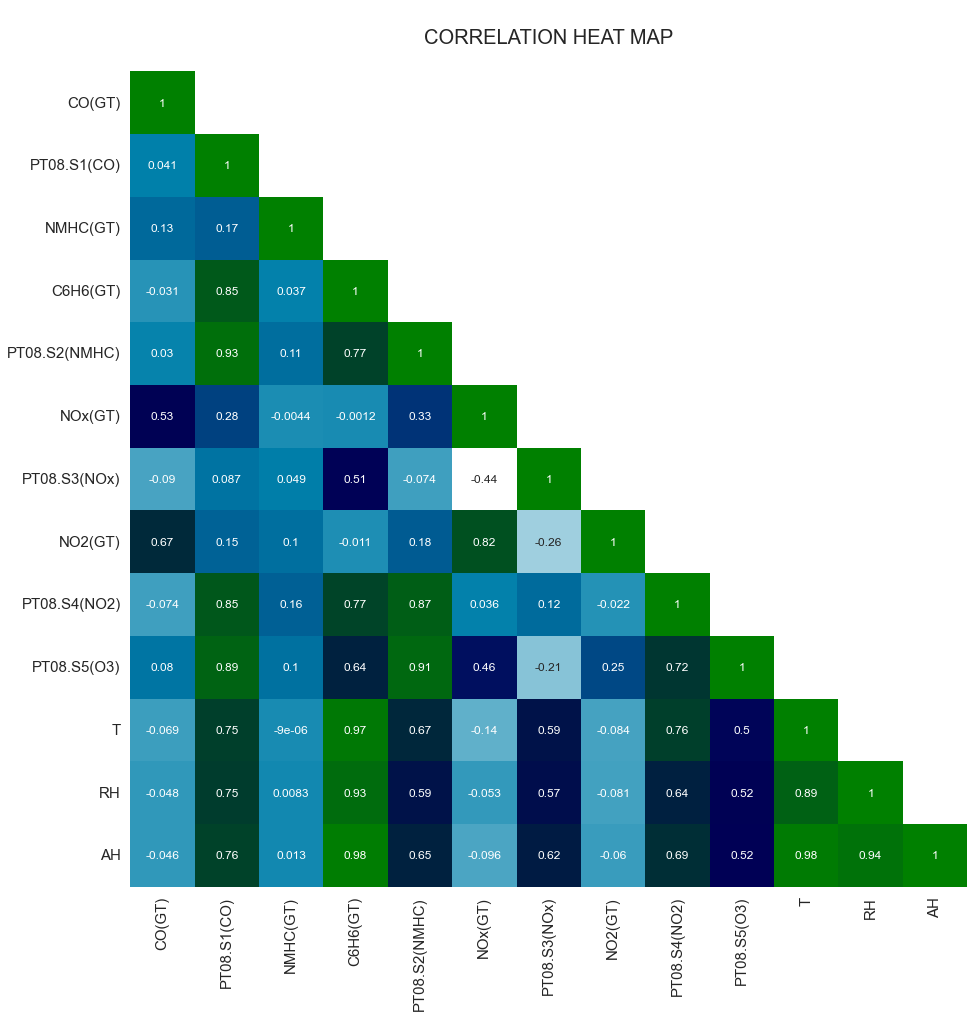

In [5]:
plt.figure(figsize=(15,15))
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr,dtype=np.bool);
mask[np.triu_indices_from(mask)]=True
mask[np.diag_indices_from(mask)]=False
ax = sns.heatmap(corr,annot=True,mask=mask,cmap='ocean_r',cbar=False)
ax.set_xticklabels(ax.get_xmajorticklabels(),fontsize=15)
ax.set_yticklabels(ax.get_ymajorticklabels(),fontsize=15)
ax.set_title("\nCORRELATION HEAT MAP\n",fontsize=20)
plt.show()

In [6]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


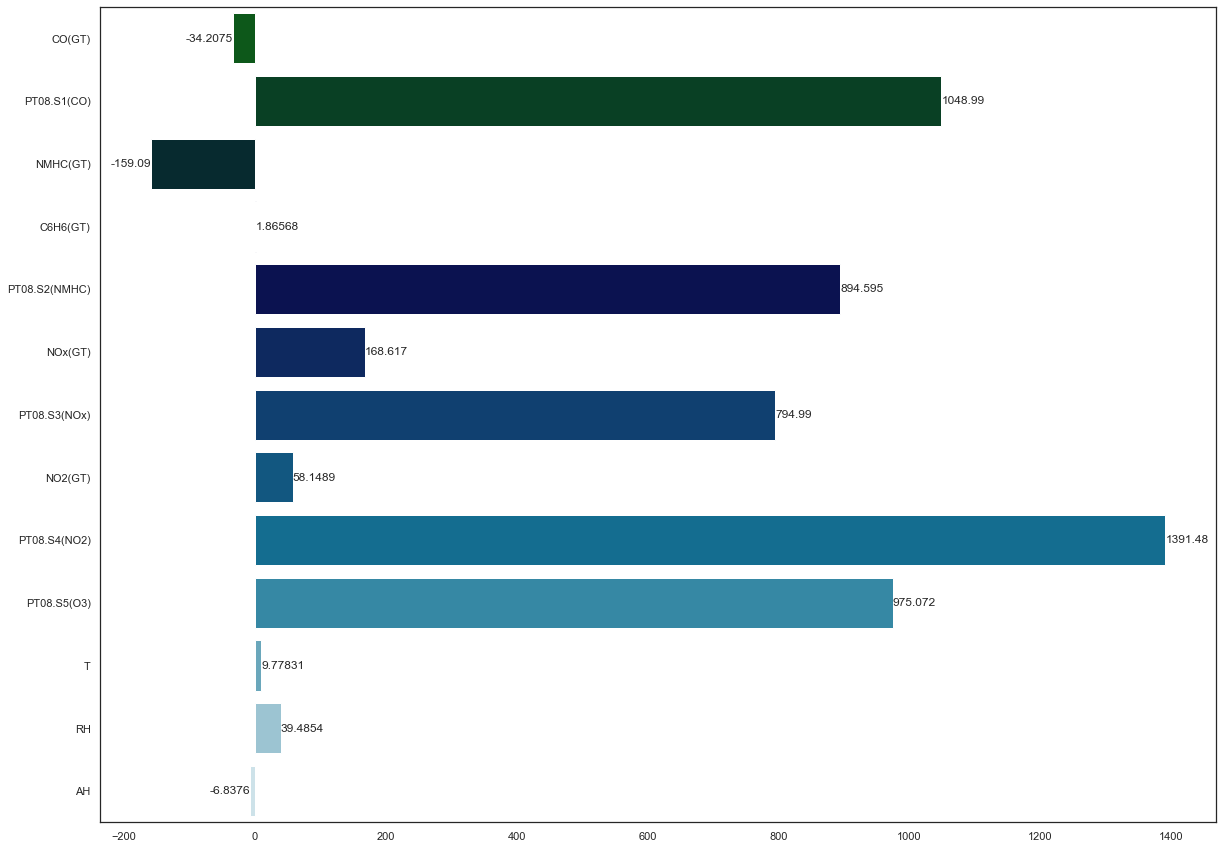

In [7]:
plt.figure(figsize=(20,15))
value = data.describe().loc['mean'].values
keys1 = list(dict(data.describe().loc['mean']).keys())
ax = sns.barplot(value,keys1,palette='ocean')
for cont in ax.containers:
    ax.bar_label(cont)
plt.show()

In [8]:
data.isna().any()

Date             True
Time             True
CO(GT)           True
PT08.S1(CO)      True
NMHC(GT)         True
C6H6(GT)         True
PT08.S2(NMHC)    True
NOx(GT)          True
PT08.S3(NOx)     True
NO2(GT)          True
PT08.S4(NO2)     True
PT08.S5(O3)      True
T                True
RH               True
AH               True
dtype: bool

In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [11]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-

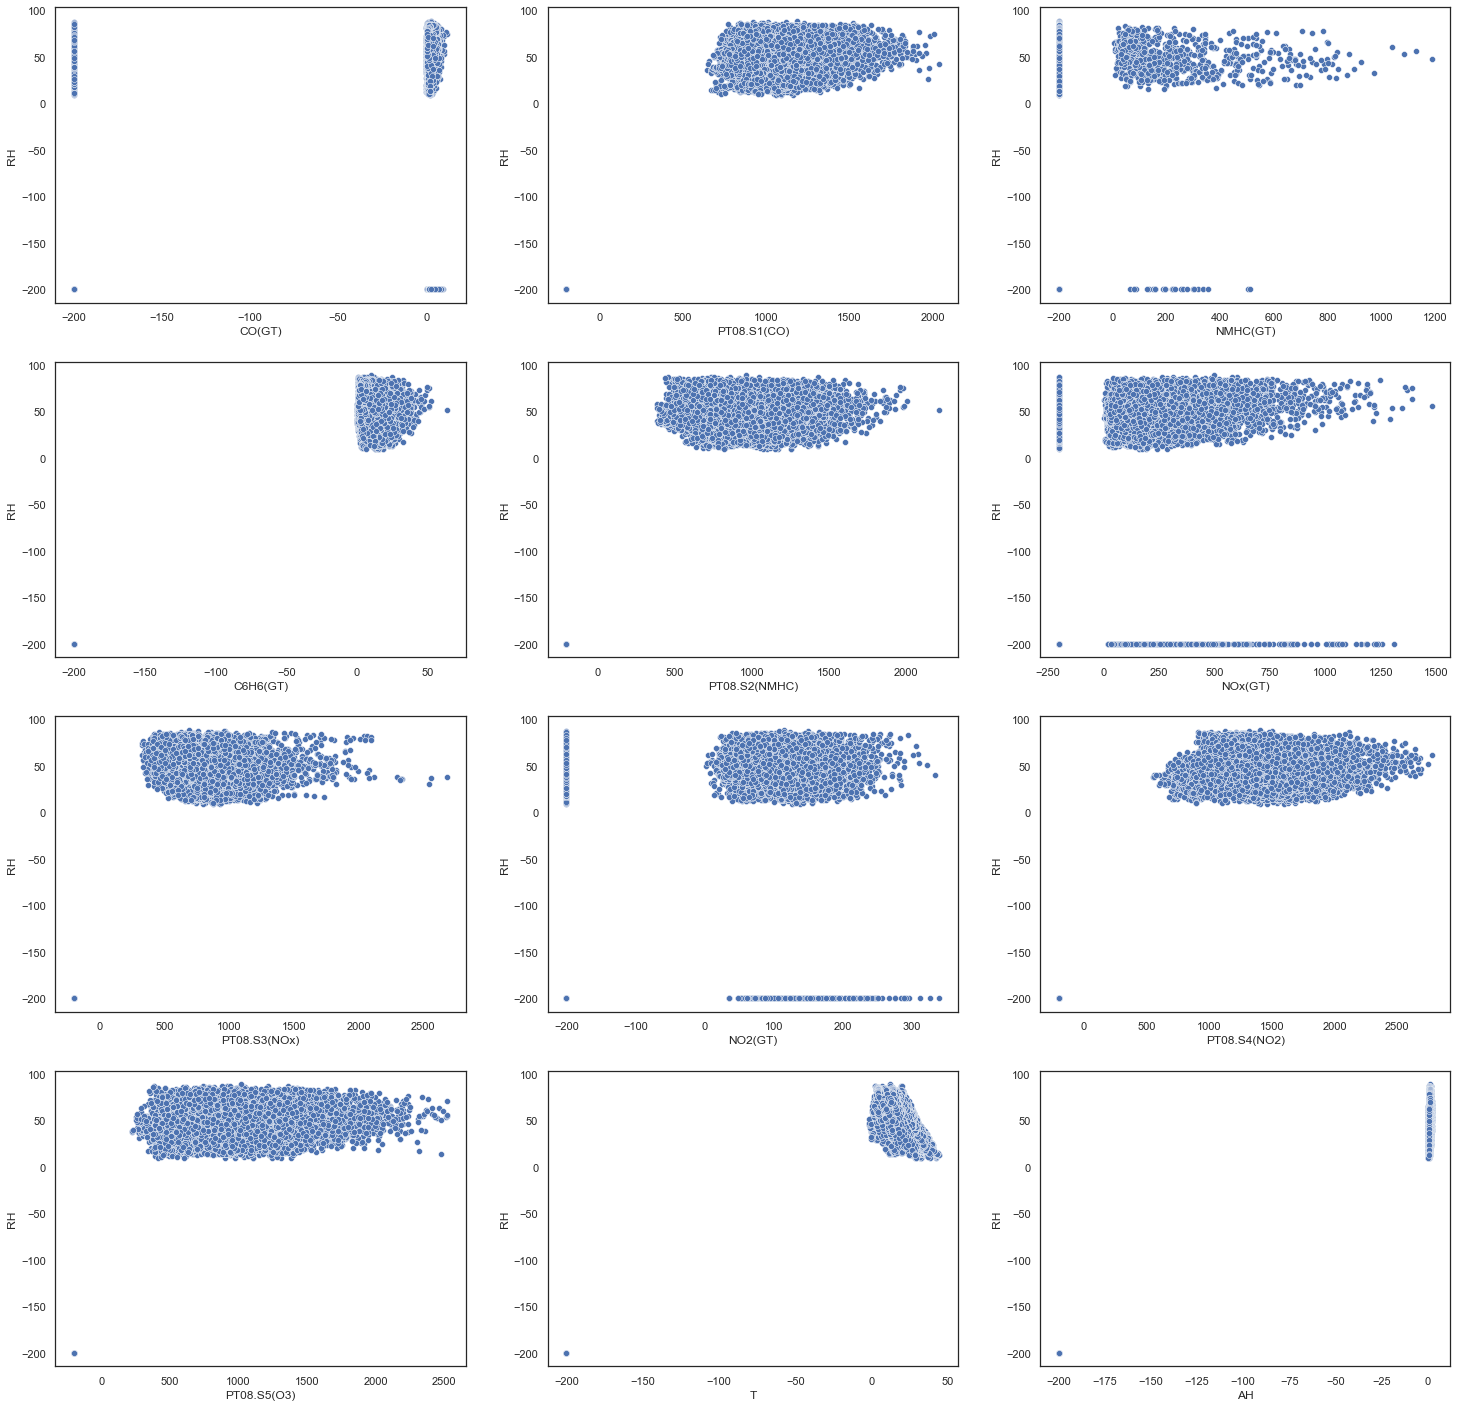

In [12]:
colum = list(data.columns)
colum.remove('Date')
colum.remove('Time')
colum.remove('RH')
plot,axes = plt.subplots(ncols=3,nrows=4,figsize=(25,25))
row,column=0,0
for index,value in enumerate(colum):
    if index in [2,5,8,11]:
        sns.scatterplot(data[value],data['RH'],ax=axes[row][column],palette='ocean_r')
        row+=1
        column=0
    else:
        sns.scatterplot(data[value],data['RH'],ax=axes[row][column],palette='ocean_r')
        column+=1
plt.show()

## Data cleaning and preprocessing

In [13]:
data_1=data.drop(['Date','Time'],axis='columns')

In [14]:
X_train,X_test,y_train,y_test = train_test_split(data_1.drop('RH',axis=1),data_1['RH'],test_size=0.33,random_state=42)

In [15]:
y_test.shape

(3088,)

In [16]:
y_train

2653    49.5
5471    50.1
5681    56.6
1541    56.4
5651    78.1
        ... 
5734    45.5
5191    57.6
5390    61.4
860     35.7
7270    56.2
Name: RH, Length: 6269, dtype: float64

In [17]:
y_train

2653    49.5
5471    50.1
5681    56.6
1541    56.4
5651    78.1
        ... 
5734    45.5
5191    57.6
5390    61.4
860     35.7
7270    56.2
Name: RH, Length: 6269, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
min_max_scaler_X,min_max_scaler_y= MinMaxScaler(),MinMaxScaler()

In [49]:
X_train = pd.DataFrame(columns=X_train.columns,data=min_max_scaler_X.fit_transform(X_train))
y_train = min_max_scaler_y.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
X_test = pd.DataFrame(columns=X_test.columns,data=min_max_scaler_X.fit_transform(X_test))
y_test = min_max_scaler_y.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

In [50]:
X_train.shape

(6269, 12)

In [51]:
y_train.shape

(6269,)

In [52]:
X_test.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,0.951773,0.505804,0.0,0.818723,0.467150,0.181656,0.474074,0.517110,0.576134,0.334190,0.930807,0.994950
1,0.000000,0.488393,0.0,0.812773,0.435433,0.140560,0.462745,0.471483,0.572773,0.355490,0.918451,0.996107
2,0.957920,0.636607,0.0,0.851250,0.606253,0.301965,0.462745,0.657795,0.565042,0.594565,0.927100,0.994268
3,0.960284,0.580804,0.0,0.850853,0.604440,0.373437,0.384749,0.699620,0.498487,0.543885,0.879736,0.991854
4,0.951773,0.520536,0.0,0.812773,0.434980,0.298987,0.469281,0.760456,0.366387,0.418656,0.854613,0.991281


In [53]:
y_test

array([0.81364738, 0.86560443, 0.8046415 , ..., 0.85452026, 0.97609976,
       0.94076896])

In [54]:
from sklearn.metrics import mean_squared_error

## Model Selection

In [55]:
def get_best_model(model_list,X_train,X_test,y_train,y_test):
    model_dict={}
    for model in model_list:
        model.fit(X_train,y_train)
        model_dict[str(model)]=(model.predict(X_test),model.score(X_test,y_test)*100,mean_squared_error(y_test,model.predict(X_test)),model)
    return model_dict

In [56]:
models=[LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor()]

In [57]:
model_dict=get_best_model(models,X_train,X_test,y_train,y_test)

## Implementing polynomial regression and appending to the created models

In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures()

In [59]:
data_py = poly_feat.fit_transform(data_1.drop('RH',axis=1))

In [60]:
data_py.shape

(9357, 91)

In [61]:
X_train,X_test,y_train,y_test = train_test_split(data_py,data_1['RH'],test_size=0.33,random_state=42)

In [62]:
lr = LinearRegression()
lr.fit(X_train,y_train)
model_dict['PolynomialFeatures()']=(lr.predict(X_test),lr.score(X_test,y_test)*100,mean_squared_error(y_test,lr.predict(X_test)),lr)

## Prediction Analysis by various models

In [34]:
accuracy = [value[1] for keys,value in model_dict.items()]
keys = list(model_dict.keys())

Text(0.5, 1.0, '\nAccuracy analysis\n')

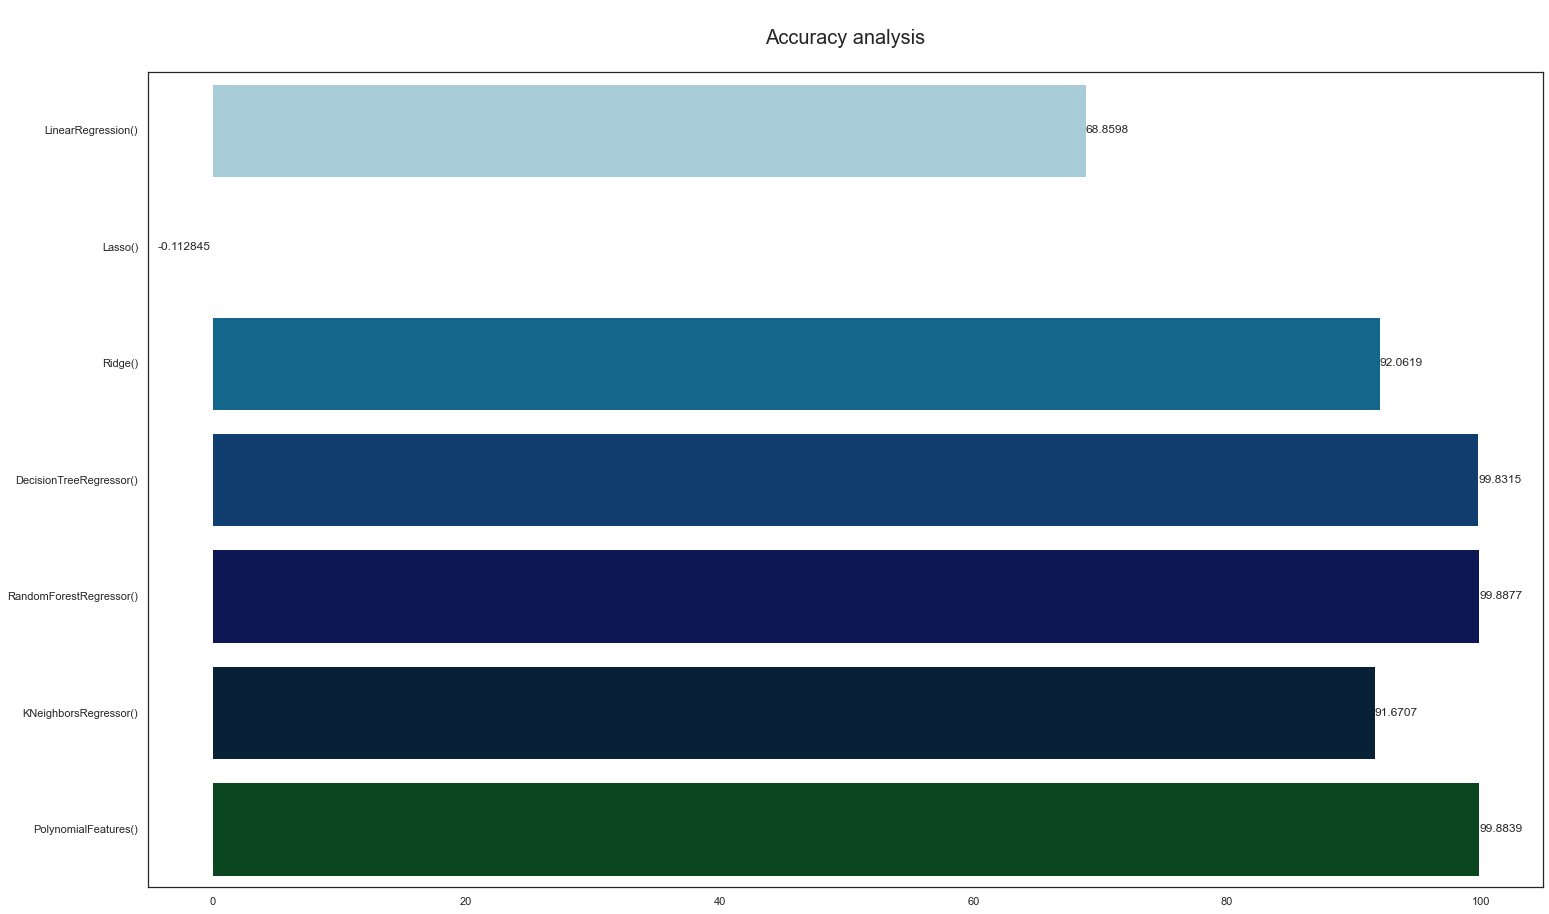

In [35]:
plt.figure(figsize=(25,15))
ax= sns.barplot(y=keys,x=accuracy,palette='ocean_r')
for cont in ax.containers:
    ax.bar_label(cont)
ax.set_title('\nAccuracy analysis\n',fontsize=20)

## Exporting the best models for the above models and also the transformation objects used

In [36]:
a= model_dict.pop('Lasso()')

In [37]:
model_dict

{'LinearRegression()': (array([0.74662869, 0.78323264, 0.6707008 , ..., 0.77887298, 0.83119814,
         0.82552899]),
  68.85975831499287,
  0.009635030660101627,
  LinearRegression()),
 'Ridge()': (array([0.80315037, 0.82849488, 0.75800939, ..., 0.82637624, 0.86003256,
         0.86880989]),
  92.06188820761031,
  0.0024561129382567747,
  Ridge()),
 'DecisionTreeRegressor()': (array([0.82033426, 0.86072423, 0.80675487, ..., 0.85584958, 0.96970752,
         0.93523677]),
  99.83148053295655,
  5.214122125999267e-05,
  DecisionTreeRegressor()),
 'RandomForestRegressor()': (array([0.8126532 , 0.86101323, 0.80433148, ..., 0.86066852, 0.94703343,
         0.93254178]),
  99.88768558886638,
  3.475094399683598e-05,
  RandomForestRegressor()),
 'KNeighborsRegressor()': (array([0.78593315, 0.89533426, 0.7704039 , ..., 0.85229805, 0.85376045,
         0.83279944]),
  91.67070383830502,
  0.0025771483955321015,
  KNeighborsRegressor()),
 'PolynomialFeatures()': (array([34.96164859, 50.66550571

In [86]:
from pickle import dump as d

In [87]:
for keys,items in model_dict.items():
    with open(keys+".pkl",'wb') as file:
        d(items[3],file)

In [88]:
object_dict={"Scaler object for X":min_max_scaler_X,"Scaler object for y":min_max_scaler_y,"Polynomial transform X":poly_feat}

In [90]:
for keys,values in object_dict.items():
    with(open(keys+".pkl","wb")) as file:
        d(values,file)